## Importing All Packages Needed for the Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

## Reading In All of the Files for the Project

In [3]:
may = pd.read_pickle('../data/may.pkl')
june = pd.read_pickle('../data/june.pkl')
july = pd.read_pickle('../data/july.pkl')
may_trip = pd.read_csv('../data/may_trip.csv')
june_trip = pd.read_csv('../data/june_trip.csv')
july_trip = pd.read_csv('../data/july_trip.csv')

## company_dict = {'Bird':0, 'Lyft': 1, 'Gotcha': 2, 'Lime': 3, 'Spin': 4, 'Jump': 5, 'Bolt': 6}
## Trip Duration Is in Minutes

## Exploring the Data

In [4]:
#Checking the datatypes of each dataset
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20283582 entries, 0 to 20283581
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 928.5+ MB


In [5]:
#Checking the datatypes of each dataset
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28037408 entries, 0 to 28037407
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.3+ GB


In [6]:
#Checking the datatypes of each dataset
july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066524 entries, 0 to 25075444
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.3+ GB


In [7]:
#Checking the datatypes of each dataset
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubTimeStamp    224969 non-null  object 
 1   companyName     224969 non-null  object 
 2   tripRecordNum   224969 non-null  object 
 3   sumdID          224969 non-null  object 
 4   tripDuration    224969 non-null  float64
 5   tripDistance    224969 non-null  float64
 6   startDate       224969 non-null  object 
 7   startTime       224969 non-null  object 
 8   endDate         224969 non-null  object 
 9   endTime         224969 non-null  object 
 10  startLatitude   224969 non-null  float64
 11  startLongitude  224969 non-null  float64
 12  endLatitude     224969 non-null  float64
 13  endLongitude    224969 non-null  float64
 14  tripRoute       224969 non-null  object 
 15  create_dt       224969 non-null  object 
dtypes: float64(6), object(10)
memory usage: 27.5+ MB


In [8]:
#Checking the datatypes of each dataset
june_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubTimeStamp    205627 non-null  object 
 1   companyName     205627 non-null  object 
 2   tripRecordNum   205627 non-null  object 
 3   sumdID          205627 non-null  object 
 4   tripDuration    205627 non-null  float64
 5   tripDistance    205627 non-null  float64
 6   startDate       205627 non-null  object 
 7   startTime       205627 non-null  object 
 8   endDate         205627 non-null  object 
 9   endTime         205627 non-null  object 
 10  startLatitude   205627 non-null  float64
 11  startLongitude  205627 non-null  float64
 12  endLatitude     205627 non-null  float64
 13  endLongitude    205627 non-null  float64
 14  tripRoute       205627 non-null  object 
 15  create_dt       205627 non-null  object 
dtypes: float64(6), object(10)
memory usage: 25.1+ MB


In [9]:
#Checking the datatypes of each dataset
july_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubTimeStamp    134926 non-null  object 
 1   companyName     134926 non-null  object 
 2   tripRecordNum   134926 non-null  object 
 3   sumdID          134926 non-null  object 
 4   tripDuration    134926 non-null  float64
 5   tripDistance    134926 non-null  float64
 6   startDate       134926 non-null  object 
 7   startTime       134926 non-null  object 
 8   endDate         134926 non-null  object 
 9   endTime         134926 non-null  object 
 10  startLatitude   134926 non-null  float64
 11  startLongitude  134926 non-null  float64
 12  endLatitude     134926 non-null  float64
 13  endLongitude    134926 non-null  float64
 14  tripRoute       134926 non-null  object 
 15  create_dt       134926 non-null  object 
dtypes: float64(6), object(10)
memory usage: 16.5+ MB


In [10]:
#Found out how many unique devices there were by company
may_trip.groupby('companyName')['sumdID'].nunique()

companyName
Bird             2945
Bolt Mobility     342
Gotcha            105
JUMP                1
Lime             1576
Lyft             1361
SPIN              636
Name: sumdID, dtype: int64

In [11]:
#checking how many unique ids there are for each company
may.groupby('companyname')['sumdid'].nunique()

companyname
0    3064
1    1376
2     223
3    1631
4     687
5     976
6     346
Name: sumdid, dtype: int64

In [12]:
#checking how many unique ids there are in the datasets
may.sumdid.nunique()

8303

In [13]:
#double checking the math
may_trip.sumdID.nunique()

6966

In [14]:
#Found out how many unique devices there were by company
june_trip.groupby('companyName')['sumdID'].nunique()

companyName
Bird             2864
Bolt Mobility     329
Gotcha            133
JUMP              182
Lime             1423
Lyft             1141
SPIN              670
Name: sumdID, dtype: int64

In [15]:
#double checking the math
june_trip.sumdID.nunique()

6742

In [16]:
#Found out how many unique devices there were by company
july_trip.groupby('companyName')['sumdID'].nunique()

companyName
Bird             2471
Bolt Mobility     268
Gotcha            103
JUMP              409
Lime              810
Lyft             1012
SPIN              512
Name: sumdID, dtype: int64

In [17]:
#double checking the math
july_trip.sumdID.nunique()

5585

In [18]:
#looking to see what columns have null values
may.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
dtype: int64

In [19]:
#looking to see what columns have null values
june.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    285
companyname      0
dtype: int64

In [20]:
#looking to see what columns have null values
july.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    202
companyname      0
dtype: int64

In [21]:
#looking to see what columns have null values
may_trip.isnull().sum()

pubTimeStamp      0
companyName       0
tripRecordNum     0
sumdID            0
tripDuration      0
tripDistance      0
startDate         0
startTime         0
endDate           0
endTime           0
startLatitude     0
startLongitude    0
endLatitude       0
endLongitude      0
tripRoute         0
create_dt         0
dtype: int64

In [22]:
#looking to see what columns have null values
june_trip.isnull().sum()

pubTimeStamp      0
companyName       0
tripRecordNum     0
sumdID            0
tripDuration      0
tripDistance      0
startDate         0
startTime         0
endDate           0
endTime           0
startLatitude     0
startLongitude    0
endLatitude       0
endLongitude      0
tripRoute         0
create_dt         0
dtype: int64

In [23]:
#looking to see what columns have null values
july_trip.isnull().sum()

pubTimeStamp      0
companyName       0
tripRecordNum     0
sumdID            0
tripDuration      0
tripDistance      0
startDate         0
startTime         0
endDate           0
endTime           0
startLatitude     0
startLongitude    0
endLatitude       0
endLongitude      0
tripRoute         0
create_dt         0
dtype: int64

In [24]:
#making sure the columns will read when there's capital letters
july_trip.pubTimeStamp

0         2019-07-01 00:02:52.213000
1         2019-07-01 00:02:52.213000
2         2019-07-01 00:02:52.213000
3         2019-07-01 00:02:52.213000
4         2019-07-01 00:02:52.213000
                     ...            
134921           2019-08-01 04:53:48
134922           2019-08-01 04:53:48
134923           2019-08-01 04:53:48
134924           2019-08-01 07:04:00
134925           2019-08-01 07:04:00
Name: pubTimeStamp, Length: 134926, dtype: object

In [25]:
#checking which company had the most stationary bikes
may.companyname.value_counts()

3    7111655
0    4334006
1    3112581
5    2984630
4    1301001
2     915314
6     524395
Name: companyname, dtype: int64

In [26]:
#checking which company had the most stationary bikes
june.companyname.value_counts()

5    8482893
3    6152504
0    4215302
1    3084229
4    2507991
2    1830453
6    1764036
Name: companyname, dtype: int64

In [27]:
#checking which company had the most stationary bikes
july.companyname.value_counts()

5    10367575
0     3702282
3     3233573
1     2890233
2     1933513
4     1750581
6     1188767
Name: companyname, dtype: int64

In [28]:
#checking which company had the most used bikes
may_trip.companyName.value_counts()

Lime             102569
Lyft              54271
Bird              53496
SPIN               8471
Bolt Mobility      4912
Gotcha              650
JUMP                600
Name: companyName, dtype: int64

In [29]:
#checking which company had the most used bikes
june_trip.companyName.value_counts()

Lime             84728
Bird             55014
Lyft             37821
SPIN             14294
Bolt Mobility    10219
Gotcha            1803
JUMP              1748
Name: companyName, dtype: int64

In [30]:
#checking which company had the most used bikes
july_trip.companyName.value_counts()

Bird             44235
Lime             38397
Lyft             28899
SPIN             11685
Bolt Mobility     6759
JUMP              4089
Gotcha             862
Name: companyName, dtype: int64

In [31]:
#found the descriptive stats for percentage of battery charges
may.chargelevel.describe()

count    2.028330e+07
mean     6.590530e+01
std      3.041610e+01
min      0.000000e+00
25%      4.700000e+01
50%      7.200000e+01
75%      9.300000e+01
max      1.000000e+02
Name: chargelevel, dtype: float64

In [32]:
#counted the amount of times a company name came up
may.companyname.count()

20283582

In [33]:
#found the descriptive stats for percentage of battery charges
june.chargelevel.describe()

count    2.803712e+07
mean     5.830082e+01
std      3.468189e+01
min      0.000000e+00
25%      3.400000e+01
50%      6.600000e+01
75%      9.000000e+01
max      1.000000e+02
Name: chargelevel, dtype: float64

In [34]:
#counted the amount of times a company name came up
june.companyname.count()

28037408

In [35]:
#found the descriptive stats for percentage of battery charges
july.chargelevel.describe()

count    2.506632e+07
mean     5.151019e+01
std      3.733133e+01
min      0.000000e+00
25%      3.000000e+00
50%      5.900000e+01
75%      8.700000e+01
max      1.000000e+02
Name: chargelevel, dtype: float64

In [36]:
#counted the amount of times a company name came up
july.companyname.count()

25066524

## Started Analysis

In [37]:
#counting how many scooters were out by company
may_scooter_counts = may.groupby('companyname')['sumdid'].nunique()

In [38]:
#counting how many scooters were out by company
june_scooter_counts = june.groupby('companyname')['sumdid'].nunique()

In [39]:
#counting how many scooters were out by company
july_scooter_counts = july.groupby('companyname')['sumdid'].nunique()

In [40]:
#showing how many scooters were out in descending order
may_scooter_counts.sort_values(ascending = False)

companyname
0    3064
3    1631
1    1376
5     976
4     687
6     346
2     223
Name: sumdid, dtype: int64

In [41]:
#showing how many bikes were out in descending order
june_scooter_counts.sort_values(ascending = False)

companyname
0    2910
3    1455
1    1152
5    1036
4     713
6     333
2     223
Name: sumdid, dtype: int64

In [42]:
#showing how many bikes were out in descending order
july_scooter_counts.sort_values(ascending = False)

companyname
0    2583
5    1206
1    1026
3     902
4     570
6     276
2     224
Name: sumdid, dtype: int64

In [43]:
#experimenting
may_scooter_counts.filter(may['chargelevel'])

companyname
0.0    3064
0.0    3064
0.0    3064
0.0    3064
0.0    3064
       ... 
0.0    3064
6.0     346
0.0    3064
0.0    3064
6.0     346
Name: sumdid, Length: 1560109, dtype: int64

In [44]:
#experimenting
may['companyname'].value_counts()

3    7111655
0    4334006
1    3112581
5    2984630
4    1301001
2     915314
6     524395
Name: companyname, dtype: int64

In [45]:
#getting the charge by company for may
may_scooter_charge = may.groupby('companyname')['chargelevel'].nunique()

In [46]:
#checking the charge by company for may
may_scooter_charge

companyname
0     81
1     86
2     96
3    101
4    101
5    200
6    699
Name: chargelevel, dtype: int64

In [47]:
#getting the mean charge by company for may
may_scooter_mean = may.groupby('companyname')['chargelevel'].mean()

In [48]:
#checking the mean charge by company for may
may_scooter_mean.sort_values(ascending = False)

companyname
4    80.005576
0    75.929047
6    72.932402
3    71.003098
1    68.298269
2    56.573660
5    32.189535
Name: chargelevel, dtype: float64

## Trying Out Different Charts

(array([1255657.,  197647.,  105727.,  110586.,   66125.,   33620.,
          26973.,   18250.,   33895.,   23629.,   29012.,   24823.,
          26841.,   18337.,   21678.,   28674.,   28133.,   37634.,
          44874.,   38906.,   50640.,   51322.,   61512.,   65498.,
          71031.,   75239.,   62816.,   71588.,   56779.,   96515.,
          79961.,   87512.,   82597.,  102999.,  101089.,  118605.,
         114842.,  120959.,  128414.,  126216.,  148272.,  155088.,
         138107.,  169407.,  164345.,  164578.,  166909.,  153375.,
         156417.,  170262.,  157692.,  167487.,  175925.,  170677.,
         202949.,  172150.,  197167.,  188833.,  206052.,  193131.,
         207117.,  180584.,  212146.,  214324.,  212687.,  212470.,
         245481.,  252268.,  213763.,  234790.,  230047.,  244327.,
         228895.,  232468.,  216999.,  245177.,  227710.,  225722.,
         211438.,  225683.,  224729.,  211731.,  218885.,  234110.,
         221681.,  243228.,  238349.,  245792., 

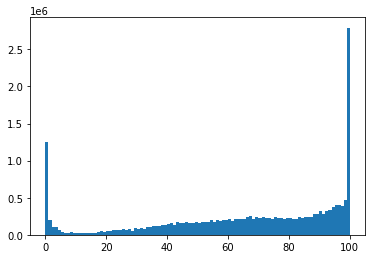

In [49]:
#plotted percentage of battery checkins by millions
plt.hist(may.chargelevel, bins = 100)

(array([2844694., 1015357.,  400520.,  499684.,  254781.,   93056.,
          41867.,   15352.,   62432.,   35290.,   54667.,   26651.,
          40935.,   27719.,   21000.,   37320.,   30095.,   48888.,
          45758.,   46965.,   68123.,   62743.,   88955.,  103424.,
          82236.,   95933.,   82256.,   87233.,   66174.,  115313.,
         107692.,  108992.,  103143.,  150944.,  121647.,  165584.,
         152644.,  155347.,  159433.,  177017.,  227292.,  227246.,
         196399.,  252789.,  215398.,  228944.,  215753.,  184815.,
         215247.,  217716.,  190388.,  202828.,  239882.,  225710.,
         249138.,  201613.,  233836.,  221349.,  233286.,  234189.,
         238649.,  211814.,  243859.,  249273.,  270685.,  248510.,
         314642.,  309894.,  257310.,  292434.,  300120.,  316377.,
         281805.,  288223.,  278368.,  310749.,  283116.,  288397.,
         267717.,  298934.,  286045.,  275255.,  269418.,  287205.,
         294250.,  314073.,  303140.,  326117., 

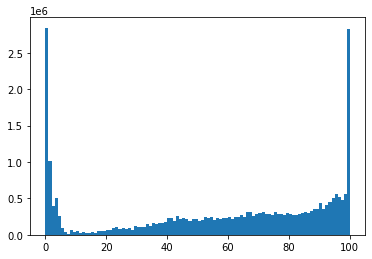

In [50]:
#plotted percentage of battery checkins by millions
plt.hist(june.chargelevel, bins = 100)

(array([3883367., 1407919.,  517373.,  678317.,  283560.,  123404.,
          58007.,   17167.,   48584.,   46813.,   44941.,   14625.,
          39520.,   12841.,   12558.,   40438.,   22452.,   53425.,
          39799.,   41334.,   63762.,   44333.,   81169.,   88069.,
          65104.,   71079.,   60216.,   64115.,   52403.,   79913.,
          96258.,   84643.,   80641.,  118016.,   88089.,  135510.,
         116839.,  122662.,  123224.,  145467.,  186599.,  184828.,
         151439.,  208691.,  160497.,  187056.,  162307.,  155357.,
         191752.,  182123.,  155411.,  154462.,  179994.,  175623.,
         207084.,  144202.,  185859.,  151716.,  169312.,  175766.,
         174800.,  165452.,  179615.,  193259.,  206216.,  174957.,
         245559.,  229719.,  203182.,  231086.,  255896.,  250944.,
         227285.,  239960.,  217427.,  251203.,  230620.,  246080.,
         225727.,  261935.,  258753.,  239797.,  235210.,  243042.,
         262840.,  262941.,  246678.,  264536., 

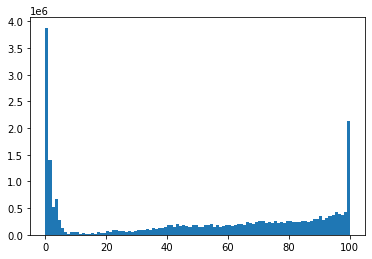

In [51]:
#plotted percentage of battery checkins by millions
plt.hist(july.chargelevel, bins = 100)

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 2., 1., 1.]),
 array([32.18953458, 35.37727068, 38.56500679, 41.75274289, 44.940479  ,
        48.1282151 , 51.31595121, 54.50368731, 57.69142342, 60.87915952,
        64.06689563, 67.25463173, 70.44236784, 73.63010394, 76.81784005,
        80.00557615]),
 <BarContainer object of 15 artists>)

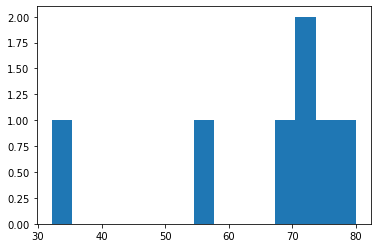

In [52]:
#histogram chart for mean may scooter charge
plt.hist(may_scooter_mean, bins = 15)

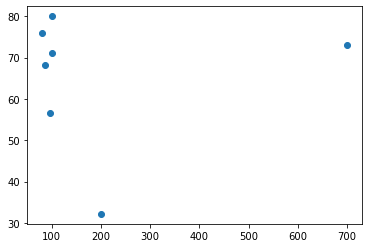

In [53]:
#scatter chart for mean may scooter charge
plt.scatter(may_scooter_charge, may_scooter_mean)

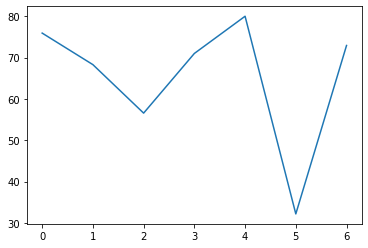

In [54]:
#line chart for mean may scooter charge
plt.plot(may_scooter_mean)

## Limiting Charge by Individual Companies and Plotting

In [55]:
#charge level for the month of may
may_scooter_charge = may.groupby('companyname')['chargelevel'].nunique()

In [56]:
#may charge level bird
bird_charge_may = may.loc[may['companyname'] == 0]

In [57]:
#may charge level bird
lyft_charge_may = may.loc[may['companyname'] == 1]

In [58]:
#may charge level bird
gotcha_charge_may = may.loc[may['companyname'] == 2]

In [59]:
#may charge level bird
lime_charge_may = may.loc[may['companyname'] == 3]

In [60]:
#may charge level bird
spin_charge_may = may.loc[may['companyname'] == 4]

In [61]:
#may charge level bird
jump_charge_may = may.loc[may['companyname'] == 5]

In [62]:
#may charge level bird
bolt_charge_may = may.loc[may['companyname'] == 6]

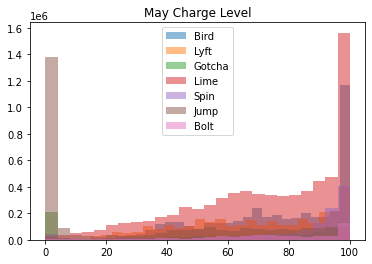

In [63]:
#combined histogram chart for may companies
legend1 = {'Bird':'0', 'Lyft':'1', 'Gotcha':'2', 'Lime':'3', 'Spin':'4', 'Jump':'5', 'Bolt':'6'}
plt.hist(bird_charge_may['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(lyft_charge_may['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(gotcha_charge_may['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(lime_charge_may['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(spin_charge_may['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(jump_charge_may['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(bolt_charge_may['chargelevel'], bins = 25, alpha = 0.5)
plt.title('May Charge Level')
plt.legend(legend1)

In [64]:
#june charge level bird
bird_charge_june = june.loc[june['companyname'] == 0]

In [65]:
#june charge level lyft
lyft_charge_june = june.loc[june['companyname'] == 1]

In [66]:
#june charge level gotcha
gotcha_charge_june = june.loc[june['companyname'] == 2]

In [67]:
#june charge level lime
lime_charge_june = june.loc[june['companyname'] == 3]

In [68]:
#june charge level spin
spin_charge_june = june.loc[june['companyname'] == 4]

In [69]:
#june charge level jump
jump_charge_june = june.loc[june['companyname'] == 5]

In [70]:
#june charge level bolt
bolt_charge_june = june.loc[june['companyname'] == 6]

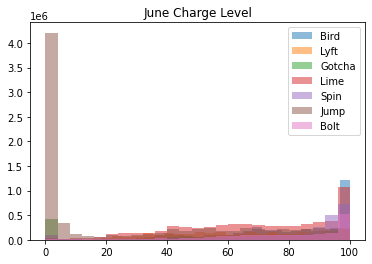

In [71]:
#combined histogram chart for june companies
legend1 = {'Bird':'0', 'Lyft':'1', 'Gotcha':'2', 'Lime':'3', 'Spin':'4', 'Jump':'5', 'Bolt':'6'}
plt.hist(bird_charge_june['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(lyft_charge_june['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(gotcha_charge_june['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(lime_charge_june['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(spin_charge_june['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(jump_charge_june['chargelevel'], bins = 25, alpha = 0.5)
plt.hist(bolt_charge_june['chargelevel'], bins = 25, alpha = 0.5)
plt.title('June Charge Level')
plt.legend(legend1)

In [72]:
#july charge level bird
bird_charge_july = july.loc[july['companyname'] == 0]

In [73]:
#july charge level bird
lyft_charge_july = july.loc[july['companyname'] == 1]

In [74]:
#july charge level bird
gotcha_charge_july = july.loc[july['companyname'] == 2]

In [75]:
#july charge level bird
lime_charge_july = july.loc[july['companyname'] == 3]

In [76]:
#july charge level bird
spin_charge_july = july.loc[july['companyname'] == 4]

In [77]:
#july charge level bird
jump_charge_july = july.loc[july['companyname'] == 5]

In [78]:
#july charge level bird
bolt_charge_july = july.loc[july['companyname'] == 6]

## Plotting Final Charts for the Presentation

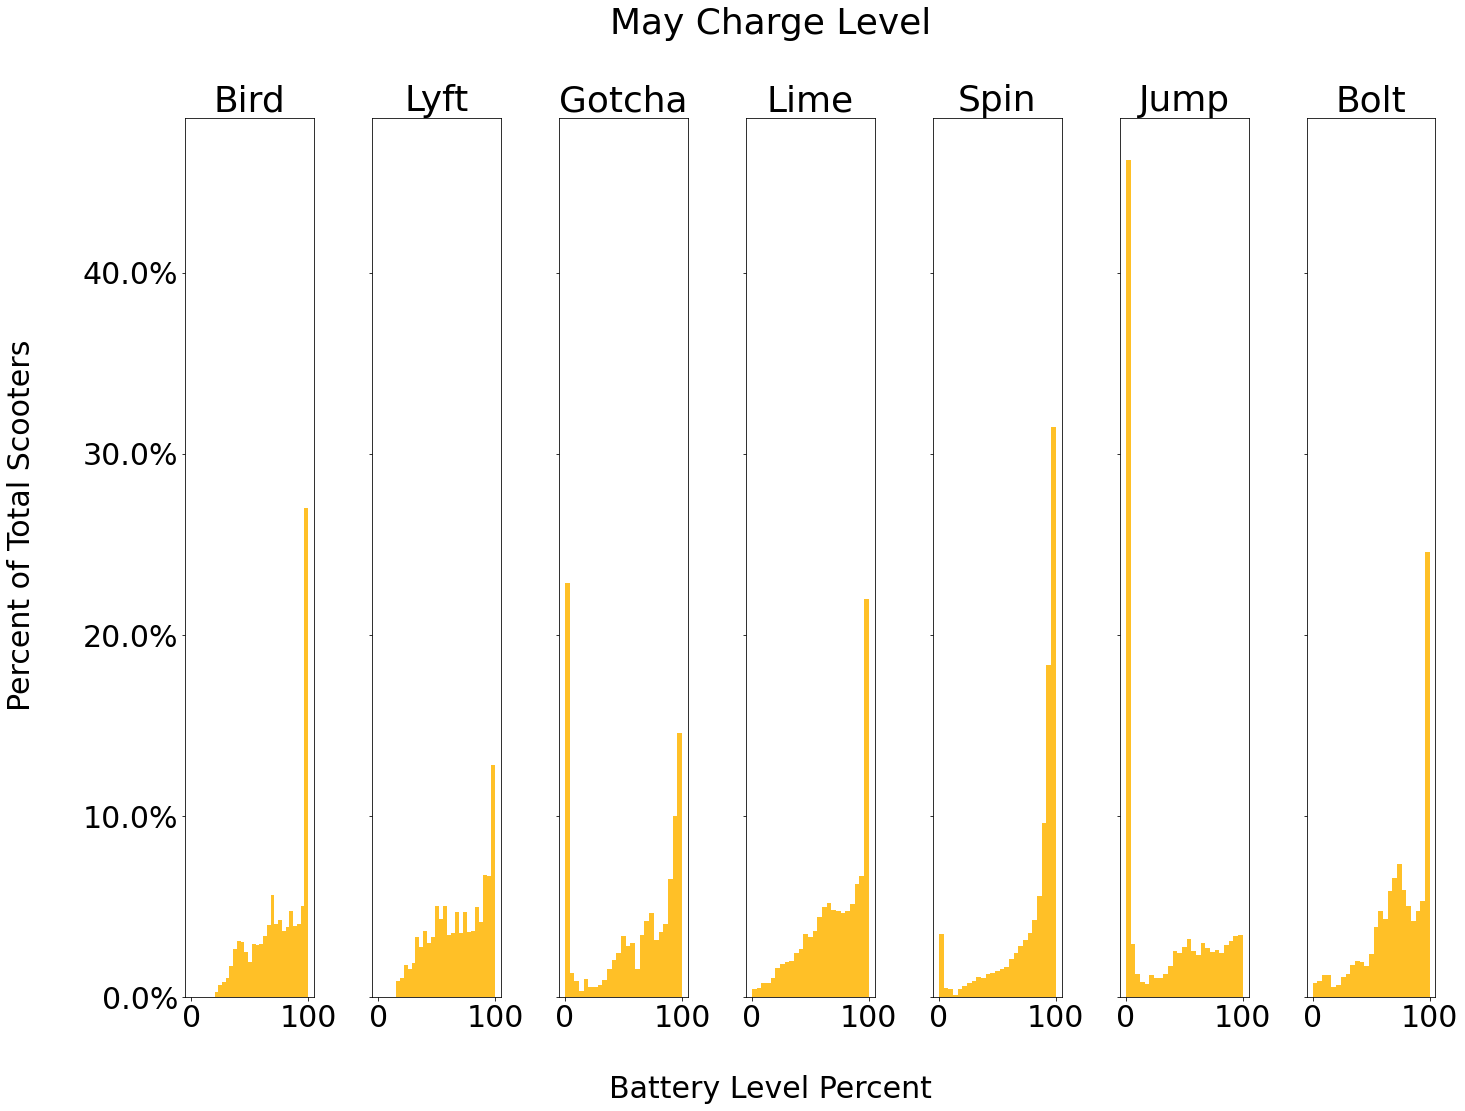

In [83]:
#separate histogram chart for july companies
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(figsize = (20, 15), nrows = 1, ncols = 7,sharey = True, sharex = True)
f.suptitle('May Charge Level')
ax1.hist(bird_charge_may['chargelevel'], color = '#FFC027', weights = np.ones(len(bird_charge_may['chargelevel']))/len(bird_charge_may['chargelevel']), bins = 25)
ax2.hist(lyft_charge_may['chargelevel'], color = '#FFC027', weights = np.ones(len(lyft_charge_may['chargelevel']))/len(lyft_charge_may['chargelevel']), bins = 25)
ax3.hist(gotcha_charge_may['chargelevel'], color = '#FFC027', weights = np.ones(len(gotcha_charge_may['chargelevel']))/len(gotcha_charge_may['chargelevel']), bins = 25)
ax4.hist(lime_charge_may['chargelevel'], color = '#FFC027', weights = np.ones(len(lime_charge_may['chargelevel']))/len(lime_charge_may['chargelevel']), bins = 25)
ax5.hist(spin_charge_may['chargelevel'], color = '#FFC027', weights = np.ones(len(spin_charge_may['chargelevel']))/len(spin_charge_may['chargelevel']), bins = 25)
ax6.hist(jump_charge_may['chargelevel'], color = '#FFC027', weights = np.ones(len(jump_charge_may['chargelevel']))/len(jump_charge_may['chargelevel']), bins = 25)
ax7.hist(bolt_charge_may['chargelevel'], color = '#FFC027', weights = np.ones(len(bolt_charge_may['chargelevel']))/len(bolt_charge_may['chargelevel']), bins = 25)
ax1.title.set_text('Bird')
ax2.title.set_text('Lyft')
ax3.title.set_text('Gotcha')
ax4.title.set_text('Lime')
ax5.title.set_text('Spin')
ax6.title.set_text('Jump')
ax7.title.set_text('Bolt')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.ylabel('Percent of Total Scooters')
#plt.xlabel('Battery Level Percent')
plt.rcParams.update({'font.size': 30})
f.text(0.5, -.03, 'Battery Level Percent', ha='center')
f.text(-.03, 0.5,'Percent of Total Scooters', va='center', rotation='vertical')
f.tight_layout();

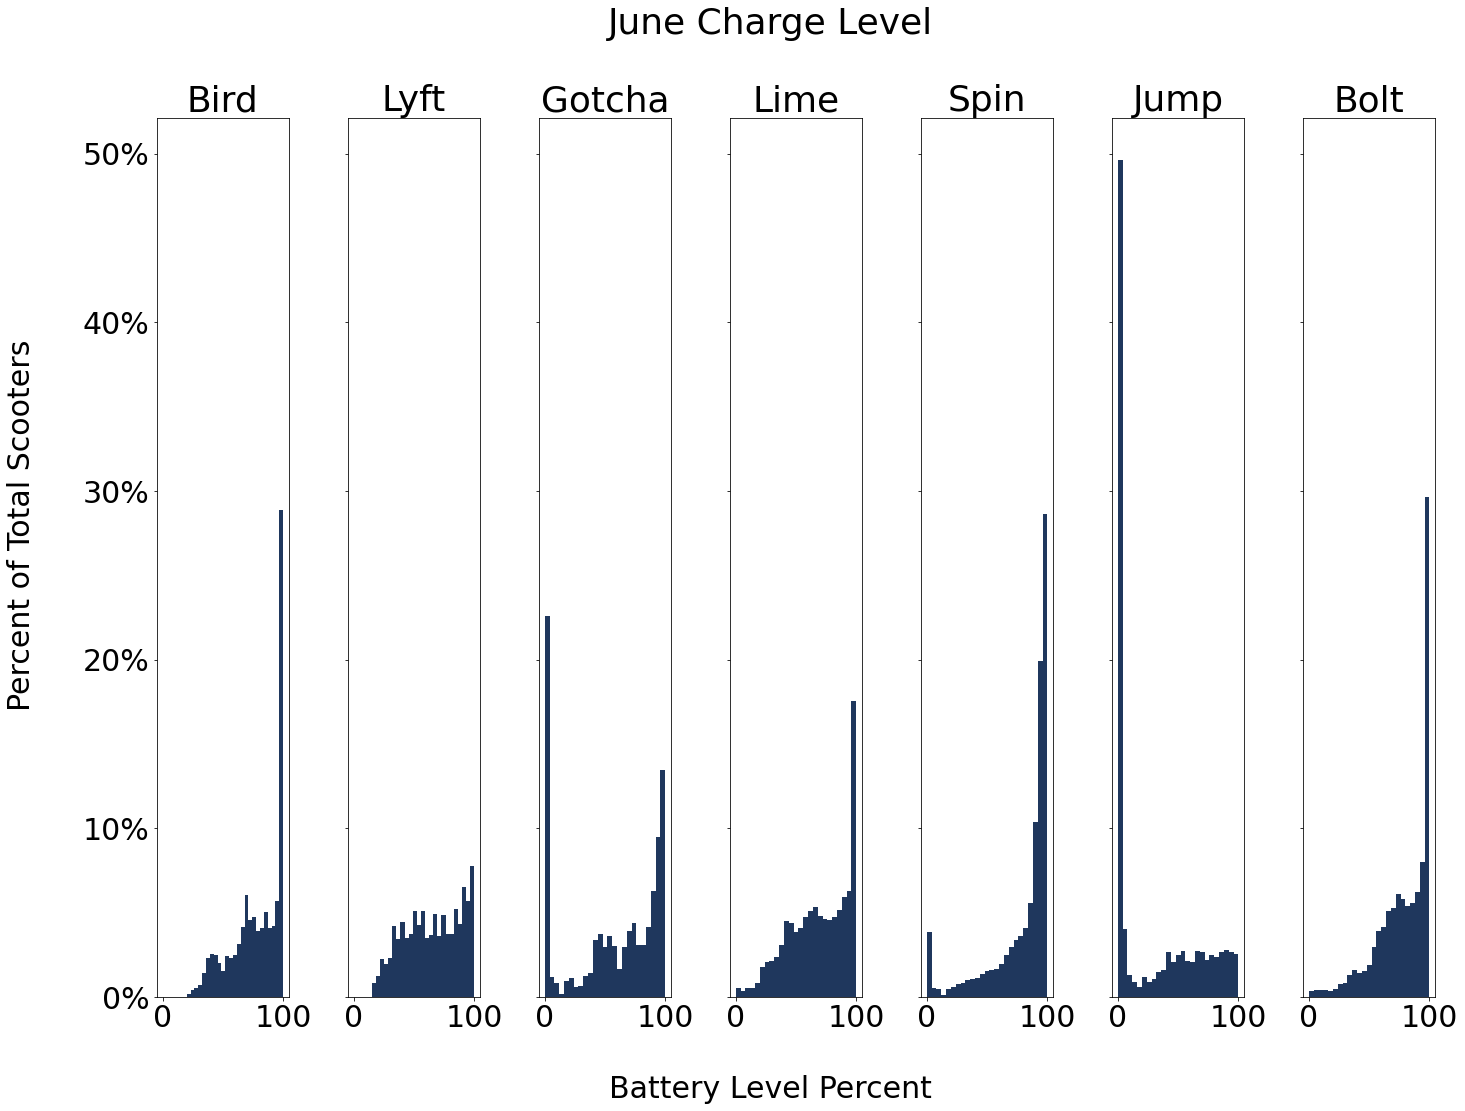

In [80]:
#separate histogram chart for july companies
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(figsize = (20, 15), nrows = 1, ncols = 7,sharey = True, sharex = True)
f.suptitle('June Charge Level')
ax1.hist(bird_charge_june['chargelevel'], color = '#1F375D', weights = np.ones(len(bird_charge_june['chargelevel']))/len(bird_charge_june['chargelevel']), bins = 25)
ax2.hist(lyft_charge_june['chargelevel'], color = '#1F375D', weights = np.ones(len(lyft_charge_june['chargelevel']))/len(lyft_charge_june['chargelevel']), bins = 25)
ax3.hist(gotcha_charge_june['chargelevel'], color = '#1F375D', weights = np.ones(len(gotcha_charge_june['chargelevel']))/len(gotcha_charge_june['chargelevel']), bins = 25)
ax4.hist(lime_charge_june['chargelevel'], color = '#1F375D', weights = np.ones(len(lime_charge_june['chargelevel']))/len(lime_charge_june['chargelevel']), bins = 25)
ax5.hist(spin_charge_june['chargelevel'], color = '#1F375D', weights = np.ones(len(spin_charge_june['chargelevel']))/len(spin_charge_june['chargelevel']), bins = 25)
ax6.hist(jump_charge_june['chargelevel'], color = '#1F375D', weights = np.ones(len(jump_charge_june['chargelevel']))/len(jump_charge_june['chargelevel']), bins = 25)
ax7.hist(bolt_charge_june['chargelevel'], color = '#1F375D', weights = np.ones(len(bolt_charge_june['chargelevel']))/len(bolt_charge_june['chargelevel']), bins = 25)
ax1.title.set_text('Bird')
ax2.title.set_text('Lyft')
ax3.title.set_text('Gotcha')
ax4.title.set_text('Lime')
ax5.title.set_text('Spin')
ax6.title.set_text('Jump')
ax7.title.set_text('Bolt')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.ylabel('Percent of Total Scooters')
#plt.xlabel('Battery Level Percent')
plt.rcParams.update({'font.size': 30})
f.text(0.5, -.03, 'Battery Level Percent', ha='center')
f.text(-.03, 0.5,'Percent of Total Scooters', va='center', rotation='vertical')
f.tight_layout();

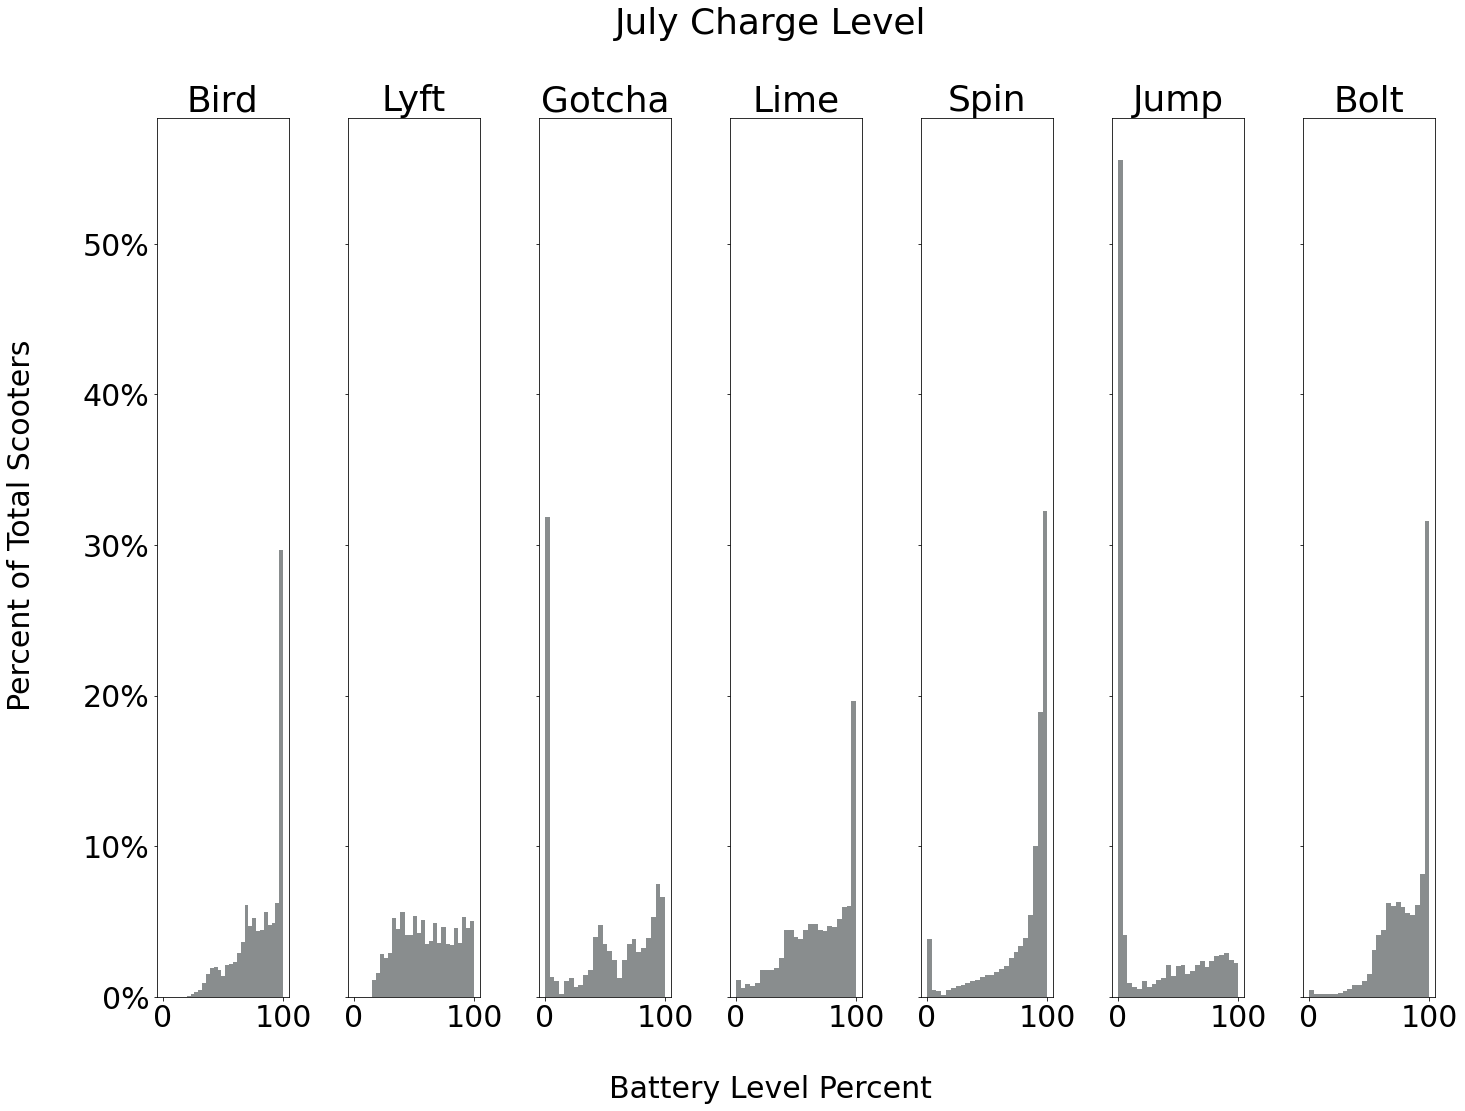

In [81]:
#separate histogram chart for july companies
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(figsize = (20, 15), nrows = 1, ncols = 7,sharey = True, sharex = True)
f.suptitle('July Charge Level')
ax1.hist(bird_charge_july['chargelevel'], color = '#898D8E', weights = np.ones(len(bird_charge_july['chargelevel']))/len(bird_charge_july['chargelevel']), bins = 25)
ax2.hist(lyft_charge_july['chargelevel'], color = '#898D8E', weights = np.ones(len(lyft_charge_july['chargelevel']))/len(lyft_charge_july['chargelevel']), bins = 25)
ax3.hist(gotcha_charge_july['chargelevel'], color = '#898D8E', weights = np.ones(len(gotcha_charge_july['chargelevel']))/len(gotcha_charge_july['chargelevel']), bins = 25)
ax4.hist(lime_charge_july['chargelevel'], color = '#898D8E', weights = np.ones(len(lime_charge_july['chargelevel']))/len(lime_charge_july['chargelevel']), bins = 25)
ax5.hist(spin_charge_july['chargelevel'], color = '#898D8E', weights = np.ones(len(spin_charge_july['chargelevel']))/len(spin_charge_july['chargelevel']), bins = 25)
ax6.hist(jump_charge_july['chargelevel'], color = '#898D8E', weights = np.ones(len(jump_charge_july['chargelevel']))/len(jump_charge_july['chargelevel']), bins = 25)
ax7.hist(bolt_charge_july['chargelevel'], color = '#898D8E', weights = np.ones(len(bolt_charge_july['chargelevel']))/len(bolt_charge_july['chargelevel']), bins = 25)
ax1.title.set_text('Bird')
ax2.title.set_text('Lyft')
ax3.title.set_text('Gotcha')
ax4.title.set_text('Lime')
ax5.title.set_text('Spin')
ax6.title.set_text('Jump')
ax7.title.set_text('Bolt')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.ylabel('Percent of Total Scooters')
#plt.xlabel('Battery Level Percent')
plt.rcParams.update({'font.size': 30})
f.text(0.5, -.03, 'Battery Level Percent', ha='center')
f.text(-.03, 0.5,'Percent of Total Scooters', va='center', rotation='vertical')
f.tight_layout();

## Jump was the only company to increase scooter counts over the three months